In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz 
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import tree


def plot_data(indata, outdata, cf):
  f = plt.figure()
  ax = f.gca() 
  custom_cmap = ListedColormap(['blue', 'green','yellow','red','black','cyan','white'])
  labels = ["Normal","N-SS","Reverse","R-SS","Strike Slip","SS-N","SS-R"]
  
  sc=ax.scatter(indata[:,0], indata[:, 1],  s=10, c=outdata, cmap=custom_cmap,
                zorder=3,   clim=(outa.min(), outa.max()))
  plt.legend(labels)
  ax.axis('tight')
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  ax.set_xlabel(r'$M_{11}$')
  ax.set_ylabel(r'$M_{22}$')
  n_classes = len(np.unique(outdata))

  xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))

  padding = np.zeros([xx.size,pcomp-2])
  plotdata = np.c_[xx.ravel(), yy.ravel(),padding]
  Z = cf.predict(plotdata).reshape(xx.shape)
  contours = ax.contourf(xx, yy, Z,
                         levels=np.arange(n_classes + 1) - 0.5, alpha=0.3,
                          cmap=custom_cmap,
                          zorder=1)
  ax.set(xlim=xlim, ylim=ylim)
  ax.set_xlabel(r'$M_{11}$')
  ax.set_ylabel(r'$M_{22}$')
   

In [ ]:
pdata = pd.read_csv('../Data/global_mech.out',sep=' ',header=0)
num_attribs = ["mrr", "mtt","mff", "mrt", "mrf", "mtf"]
#num_attribs = ["mrr", "mtt"]
cat_attribs = ["Mechanism_type"]

In [10]:
pcomp = 6
mech_pipeline = Pipeline([("ord", OrdinalEncoder())])
#num_pipeline = Pipeline([("scal",StandardScaler()),("pca",PCA(n_components=pcomp))])
num_pipeline = Pipeline([("scal",StandardScaler())])
pipeline = ColumnTransformer([("num",num_pipeline,num_attribs),("cat",mech_pipeline,cat_attribs)])
prepped = pipeline.fit_transform(pdata)
ina = prepped[:,0:pcomp]
outa = prepped[:,pcomp]

trainin, testin, trainout, testout = train_test_split(
     ina, outa, test_size=0.33, random_state=42)

print (ina)
print (outa)

[[ 2.52445362  0.10142841 -2.79559954  0.62310414  2.22437504 -1.549456  ]
 [-0.73950134 -0.18575067  0.95549022 -0.88299726  0.96235845 -1.38242495]
 [ 0.25417628 -0.06327724 -0.21718774  0.43131595  0.60107527 -0.29672318]
 ...
 [-1.87464001  1.19524284  0.96288882  0.44259761 -0.3555828  -1.14579764]
 [-0.17710741 -0.26852582  0.42501066 -0.31045309 -0.07645443 -0.26981262]
 [-0.38205341  1.36839494 -0.78687988 -0.56146999  0.80893682 -0.598307  ]]
[2. 0. 2. ... 0. 4. 5.]


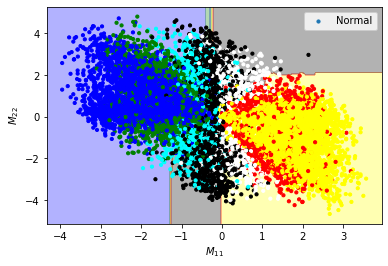

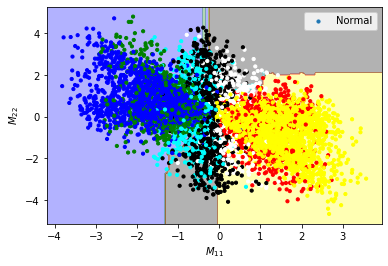

<Figure size 1080x1080 with 0 Axes>

In [11]:
#rf = GradientBoostingClassifier()
rf = RandomForestClassifier()
#rf = DecisionTreeClassifier(min_samples_leaf=1000)
#rf= ExtraTreeClassifier()
#rf = OneVsRestClassifier(svm.SVC(kernel='poly'))


rf.fit(trainin, trainout)

plot_data(ina,outa, rf)


p = rf.predict(testin)


plot_data(testin, testout, rf)

c=confusion_matrix(testout, p)


a = rf.predict(ina)
ac = accuracy_score(a,outa)
ac2 = accuracy_score(testout,p)
fig =plt.figure(figsize=(15,15))

#tree.plot_tree(rf,ax=fig.gca(),fontsize=9)
plt.show()

In [12]:
print(ac2)
print(c)

0.8702887909936368
[[3162  105   37    0    5   44   16]
 [ 370  721    0    0    1   88    2]
 [  18    0 5604   86    0    9   30]
 [   0    0  466  745    1    0   62]
 [   0    1    3    4 2537   70   77]
 [  12   47    4    0  202  808   45]
 [   2    0   25  107  144   37  647]]


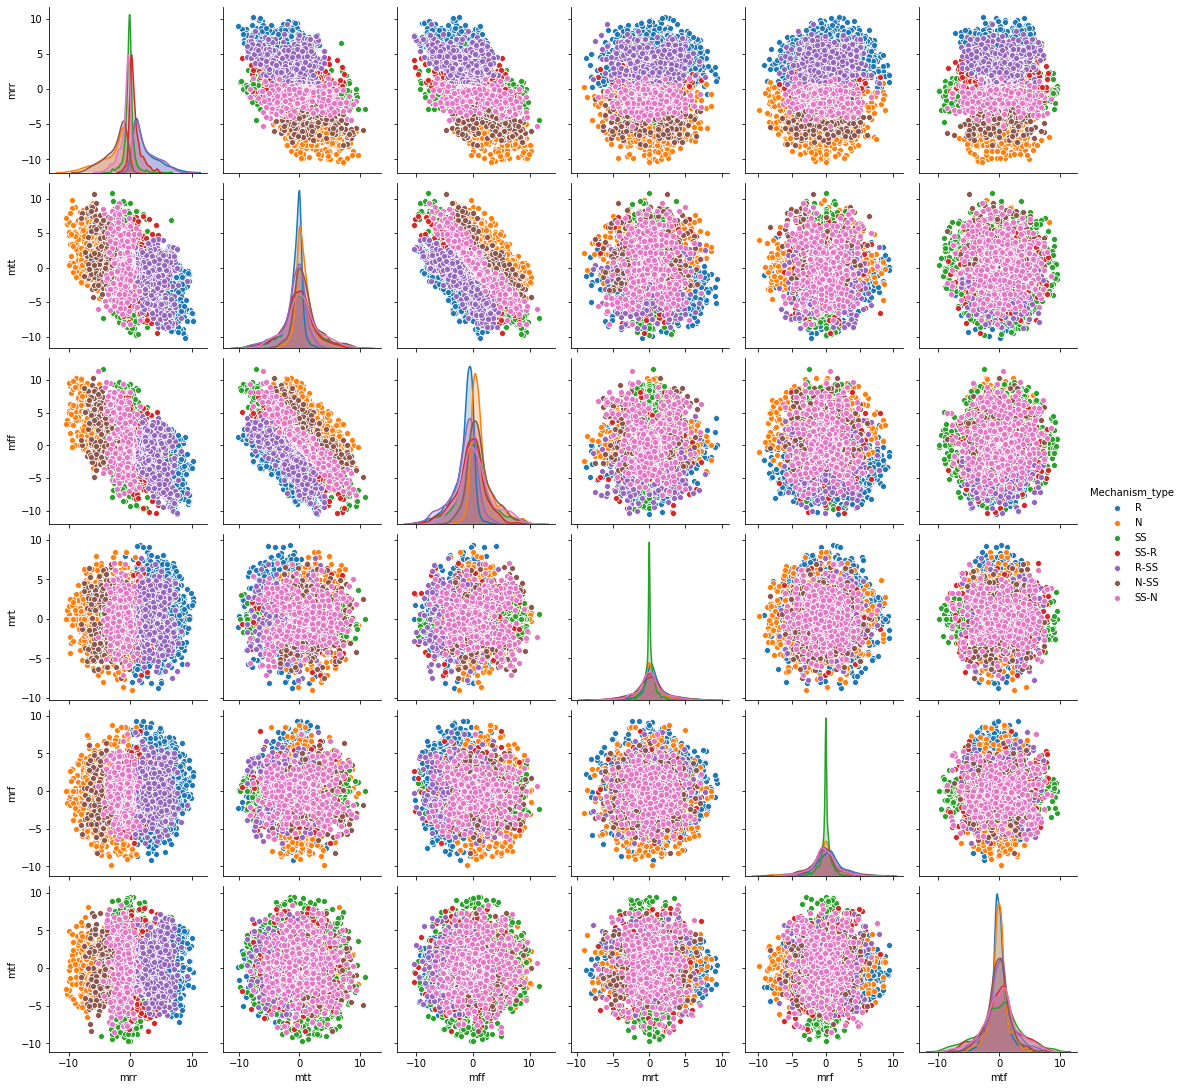

In [4]:
import seaborn as sns
sns.pairplot(pdata[np.concatenate([num_attribs,cat_attribs])],hue='Mechanism_type')